objective:
- create 10 lists of 80 words

each list will contain:
- 10 highly ranked visual words
- 10 highly ranked haptic words
- 10 high/medium visuohaptic words
- 10 lowly ranked visuohaptic words

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns #loading the dataset

#### Loads the batabase *Sensorimotor_norms_29Jan2024.csv*

**Lacaster_norms** returns all the data from the Lancaster Sensorimotor Norm data from Lynott and Connell (2020)

In [228]:
#loading the dataset
file="Sensorimotor_norms_29Jan2024.csv"
Lancaster_norms = pd.read_csv(file, sep=",")
Lancaster_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,Foot_leg.mean,Hand_arm.mean,Head.mean,...,Max_strength.sensorimotor,Exclusivity.sensorimotor,Dominant.sensorimotor,Minkowski3.perceptual,Minkowski3.action,Minkowski3.sensorimotor,N_known.perceptual,Percent_known.perceptual,N_known.action,Percent_known.action
0,A,2.214,0.000,0.429,0.000,0.000,2.429,0.000,0.357,1.071,...,2.429,0.354,Visual,2.934,1.097,2.984,14,0.737,14,0.667
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,0.381,0.429,2.714,...,4.333,0.285,Auditory,4.421,4.167,5.415,18,0.947,21,1.000
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,0.176,0.706,2.235,...,4.125,0.326,Visual,4.325,2.259,4.521,16,0.889,17,0.850
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,0.000,0.000,3.273,...,3.273,0.339,Head,3.007,3.274,3.964,17,0.850,11,0.579
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,0.000,2.474,2.632,...,3.944,0.263,Visual,4.887,3.219,5.314,18,0.947,19,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,1.263,1.474,2.632,...,3.800,0.289,Visual,3.840,2.914,4.333,20,1.000,19,1.000
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,0.300,1.650,3.150,...,3.789,0.349,Visual,3.793,3.296,4.488,19,1.000,20,1.000
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,0.053,1.789,3.421,...,3.444,0.310,Visual,3.488,3.578,4.452,18,1.000,19,1.000
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,0.800,0.800,2.267,...,3.071,0.186,Visual,3.955,2.392,4.227,14,0.778,15,0.750


> The value of these words are an average from a Linkert scale that the participants used to self report there daily relationship the words using the 11 dimentions during the orginal survey

> 0 being the least prominant and 5 being the most 

#### Returns the newly assigned dataframe _sensory_dimentions_norms_ 

In [229]:
#selecting columns
column=["Word","Auditory.mean","Gustatory.mean","Haptic.mean","Interoceptive.mean","Olfactory.mean","Visual.mean"]
sensory_dimentions_norms=pd.DataFrame(Lancaster_norms,columns=column)
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
0,A,2.214,0.000,0.429,0.000,0.000,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944
...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071


#### Returns the dataframe in order of highest to lowest VISUAL ranking

In [230]:
#sorting
visual_sorted=sensory_dimentions_norms.sort_values(by= ["Visual.mean"],ascending=False)
visual_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
30856,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000
3976,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000
2394,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000
30096,SEE,0.056,0.000,0.000,0.333,0.000,5.000
26376,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000
...,...,...,...,...,...,...,...
1611,AROMA,0.158,0.474,0.000,0.421,4.895,0.053
21939,MONOXIDE,0.235,0.000,0.000,1.471,0.941,0.000
34959,TONELESSLY,3.611,0.000,0.000,0.222,0.000,0.000
1952,AUDIBILITY,4.125,0.000,0.062,0.312,0.000,0.000


#### Returns the dataframe in order of highest to lowest HAPTIC ranking

In [231]:
#sorting
haptic_sorted = sensory_dimentions_norms.sort_values(by = ["Haptic.mean"],ascending=False)
haptic_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
15458,HANDSHAKE,0.000,0.00,4.944,0.444,0.0,3.667
26413,PRICKLY,0.133,0.20,4.933,1.867,0.2,3.267
25345,PILLOW,0.529,0.00,4.882,1.529,1.0,4.706
35066,TOUCH,0.562,0.00,4.875,1.312,0.0,2.625
35072,TOUCHING,0.200,0.05,4.850,1.950,0.0,1.700
...,...,...,...,...,...,...,...
16466,HOUSEMASTER,1.357,0.00,0.000,0.286,0.0,2.929
6741,CONSCIENCE,0.579,0.00,0.000,3.684,0.0,0.158
6738,CONQUEROR,1.833,0.00,0.000,0.278,0.0,2.389
35701,TWEET,2.722,0.00,0.000,0.278,0.0,3.722


### Visual masks 
> We selected the words with the medium ranking (valued between 2-3) for both visual and haptic words.
> These words should be variant enough to be bimodally relevant  

#### returns words with a rating between 2 and 3 called *visual.mask*

In [232]:
sensory_dimentions_norms['visual.mask']= sensory_dimentions_norms['Visual.mean'][(sensory_dimentions_norms['Visual.mean']<= 3)& (sensory_dimentions_norms['Visual.mean']>=2)] 
# mask created to select the sorted visual words that have a ranting between 2 and 3  
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN
...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN


#### Returns words with a rating between 2 and 3 called *haptic.mask*

In [233]:
sensory_dimentions_norms['haptic.mask']= sensory_dimentions_norms['Haptic.mean'][(sensory_dimentions_norms['Haptic.mean']<= 3)& (sensory_dimentions_norms['Haptic.mean']>=2)]
# mask created to select the sorted visual words that have a ranting between 2 and 3  
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429,NaN
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824,NaN
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN,NaN


#### Removing data that is not between 2 and 3 ranking for visual and haptic masked columns

In [234]:
sensory_dimentions_norms = sensory_dimentions_norms.dropna()

In [288]:
visual_haptic_sample = sensory_dimentions_norms.sample(200)
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
visual_haptic_sample = visual_haptic_sample[dimensions]
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
10895,ELECTRIC CHARGE,1.600,0.171,2.971,1.829,0.429,2.457
28517,RESIDUAL,1.188,1.000,2.625,0.875,1.750,3.000
21067,MEATINESS,0.048,2.952,2.143,0.476,1.238,2.857
32762,STIMULATINGLY,1.875,1.688,2.125,4.125,1.688,2.375
30291,SEPARABLE,0.500,0.000,2.500,0.375,0.000,2.812
...,...,...,...,...,...,...,...
4108,BUBBLEGUM,1.810,4.381,2.333,0.952,2.619,2.905
13754,FREEHANDEDNESS,0.467,0.200,2.000,1.000,0.200,2.933
15796,HEATING SYSTEM,2.250,0.000,2.750,2.500,0.850,2.050
29370,SADDLEBAG,0.500,0.111,2.000,0.389,0.389,2.778


***combines the score together!!***
 ***creating a low visuo-haptic mask***

In [236]:
vh_norms=pd.DataFrame(Lancaster_norms,columns=column)
vh_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
0,A,2.214,0.000,0.429,0.000,0.000,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944
...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071


In [237]:
vh_norms['haptic.mask']= vh_norms['Visual.mean'][(vh_norms['Haptic.mean']<= 2)& (vh_norms['Visual.mean']<=2)]
# mask created to select the sorted visual words that have a ranting between 2 and 3  
vh_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,NaN
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,NaN
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN
...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN


In [238]:
vh_norms=vh_norms.dropna()
vh_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,haptic.mask
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,1.667
17,ABDOMINALLY,0.412,0.471,0.882,2.059,0.176,1.353,1.353
22,ABHOR,1.696,0.000,0.174,2.087,0.174,1.783,1.783
23,ABHORRENCE,1.312,0.188,0.500,2.750,0.438,1.500,1.500
25,ABHORRING,1.000,0.200,0.000,3.200,0.200,1.400,1.400
...,...,...,...,...,...,...,...,...
39669,ZESTFULNESS,1.235,1.941,0.529,2.059,1.529,1.941,1.941
39670,ZESTY,0.263,3.737,0.263,1.632,2.263,0.842,0.842
39676,ZINC,0.100,1.150,0.800,0.450,0.350,1.950,1.950
39678,ZING,2.812,0.438,0.875,1.125,0.062,1.625,1.625


In [239]:
np.random.seed(8)

In [240]:
vh_norm_sample = vh_norms.sample(200)
dimensions = list(vh_norm_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
vh_norm_sample = vh_norm_sample[dimensions]
vh_norm_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
24468,PARAPSYCHOLOGY,2.278,0.333,0.500,0.833,0.500,1.778
18550,INTUITIONALLY,1.286,0.214,0.429,2.357,0.286,0.929
38633,WAVERINGLY,1.083,0.000,0.000,0.583,0.000,2.000
11799,EXCRETIVE,0.364,0.000,0.091,1.000,1.000,1.455
15158,GUARDIAN ANGEL,0.632,0.000,0.000,1.737,0.000,1.263
...,...,...,...,...,...,...,...
4443,CALCULATIVE,0.833,0.000,0.000,1.333,0.000,1.222
15931,HEREIN,0.714,0.071,0.286,1.000,0.214,1.357
5374,CHLORINATE,0.125,1.000,0.625,0.250,3.062,1.438
17570,INDEPENDENTLY,1.059,0.529,0.471,1.824,0.412,2.000


In [241]:
vh_norms_sample = vh_norms_sample.dropna()
vh_norms_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
17643,INDISPOSITION,1.538,0.385,0.692,1.846,0.385,1.846
18667,IRONIC,3.294,0.176,0.235,1.000,0.176,1.882
31368,SLUMBER,1.111,0.167,0.611,3.556,0.111,2.000
37006,UNMINDFUL,1.500,0.000,0.000,1.714,0.000,1.857
33175,SUBJECTIVE,1.944,0.333,0.500,1.333,0.333,1.611
...,...,...,...,...,...,...,...
3310,BLOODLUST,0.556,0.556,0.389,1.389,0.611,1.722
38284,VOICE,4.750,0.375,0.688,1.812,0.500,1.125
22699,NEW WAVE,3.118,0.000,0.059,0.706,0.000,1.529
741,AIRING,1.611,0.333,1.000,0.389,0.722,1.778


In [242]:
unique_df = vh_norms_sample.drop_duplicates(subset=['Word'])
unique_df 

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
17643,INDISPOSITION,1.538,0.385,0.692,1.846,0.385,1.846
18667,IRONIC,3.294,0.176,0.235,1.000,0.176,1.882
31368,SLUMBER,1.111,0.167,0.611,3.556,0.111,2.000
37006,UNMINDFUL,1.500,0.000,0.000,1.714,0.000,1.857
33175,SUBJECTIVE,1.944,0.333,0.500,1.333,0.333,1.611
...,...,...,...,...,...,...,...
3310,BLOODLUST,0.556,0.556,0.389,1.389,0.611,1.722
38284,VOICE,4.750,0.375,0.688,1.812,0.500,1.125
22699,NEW WAVE,3.118,0.000,0.059,0.706,0.000,1.529
741,AIRING,1.611,0.333,1.000,0.389,0.722,1.778


#### Creating a random seed to ensure constistant results

In [243]:
np.random.seed(8)
# fixes the starting point of randomization
# 8 becuase its my favorite number!

#### Subselecting the a random 300 masked words between (2 and 3 values)

In [289]:
visual_haptic_sample = sensory_dimentions_norms.sample(200)
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
visual_haptic_sample = visual_haptic_sample[dimensions]
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
572,AFFIX,0.929,0.143,2.857,1.000,0.214,2.571
31626,SOAK UP,0.444,0.333,2.667,2.111,0.278,2.722
33323,SUCKING,2.688,1.438,2.625,2.625,0.375,2.938
37689,UNWIELDINESS,0.538,0.000,2.154,1.154,0.000,2.846
32740,STIFFEN,0.059,0.000,2.118,1.059,0.000,2.824
...,...,...,...,...,...,...,...
10311,DRANK,1.500,3.643,2.071,3.357,1.000,3.000
7394,COUNTERWEIGHT,0.211,0.053,2.105,0.421,0.053,2.895
27102,QUAKE,2.611,0.000,2.167,2.000,0.056,2.611
7533,CRANIAL,0.765,0.353,2.000,1.412,0.235,2.529


### Graphs 
These graphs depict the whole distribution of the values for valual and haptic independantly. The dotten line is there to indicate the highest 300 (visual) and 500 (haptic) words in the dataset.

#### Visual words and Sensorimotor Strength graph 
Returns a graph depicting all the visual words with a line indicting the 300 words with the lowest variance 

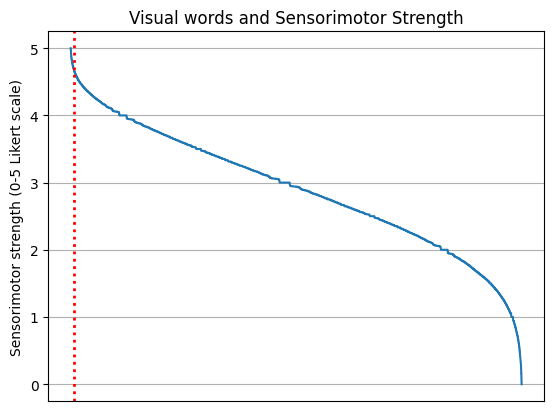

In [245]:
# defining x and y axis 
x_data = visual_sorted["Word"]
y_data = visual_sorted["Visual.mean"]

# defining the type of plot
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

# names of labels 
ax.set(xlabel = 'Visual words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Visual words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()

# add verticle line at 300
ax.axvline(x = 300, color = 'red', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()

In [ ]:
# Sample data (replace with your actual data)
x_data = visual_sorted["Word"]
y_data = visual_sorted["Visual.mean"]

# Create the scatter plot
plt.scatter(x_data, y_data)

plt.scatter(x_data, y_data, markersize=3)
# Add labels for the axes (optional)
plt.xlabel("Words")
plt.ylabel("magnitude")



plt.xticks([])
#plt.ylim(bottom=min(y) - , top=max(y) + 10)
# Add a title for the plot (optional)
plt.title("Visual words and sensorimotor strength")

# Display the plot
plt.show()

#### Haptic words and Senorimotor Strength graph
Returns a graph depicting all the haptic words with a line indicting the 500 words with the lowest variance 

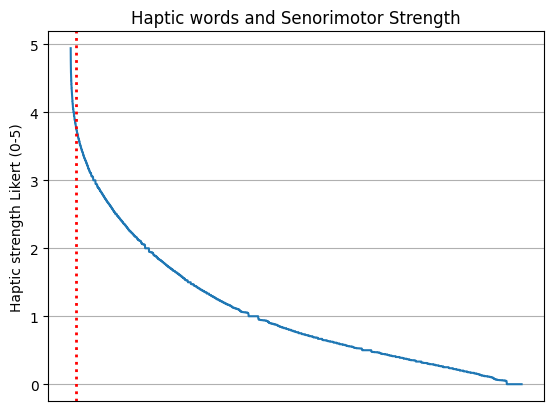

In [246]:
# defining x and y axis 
x_data = haptic_sorted["Word"]
y_data = haptic_sorted["Haptic.mean"]

#defining the type of plot
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

#labling x and y axis 
ax.set(xlabel = 'Haptic Words', ylabel='Haptic strength Likert (0-5)',
       title = 'Haptic words and Senorimotor Strength')

ax.get_xaxis().set_visible(False)
ax.grid()

# add verticle line
ax.axvline(x = 500, color = 'red', linestyle = 'dotted', linewidth = 2)

plt.show()

#### Indexing the top 300 (visual) and 500 (haptic) words

In [247]:
# indexing subset
visual_subset = visual_sorted.iloc[:200]
haptic_subset = haptic_sorted.iloc[:300]

#### Returning 300 haptic words that have a visual score less <= 4
*haptic_subset* creates a subset to imporove the strenth of haptic words without an extrememly high visual value. This will ensure that the visuo-haptic words have a more equal distribution between visual and haptic strengths

In [298]:
haptic_subset = haptic_subset[haptic_subset['Visual.mean'] <= 4]
haptic_subset = haptic_subset.iloc[:200]

#### Returning *visual* or *haptic* in a new *mixed* column
**combined_visual_haptic_df** column combines the visual and the haptic words together.

Returning a *mixed* colum with 404 highly ranked visual and highly ranked haptic words 
Returns the 600 words lebeled as *visual* or *haptic*

#### Eliminating the repeated words 
**unique_df** removes the repeated words in the *mixed* column = 600 unique words

In [300]:
# create new dataframe for the visual subset
visual_subset_df = pd.DataFrame(visual_subset)
# set it to a new column called 'mixed'
visual_subset_df['mixed'] = 'visual' 


# create a new dataframe for the haptic subset
haptic_subset_df = pd.DataFrame(haptic_subset)
# set it to a new coumn called 'mixed'
haptic_subset_df['mixed'] = 'haptic'

# create new dataframe for the visuohaptic low subset
vh_norms_low_subset_df = pd.DataFrame(vh_norms_sample)
# set it to a new column called 'mixed'
vh_norms_low_subset_df['mixed'] = 'vh_low'

# create new dataframe for the visuohaptic medium subset
vh_norm_med_subset_df = pd.DataFrame(visual_haptic_sample)
# set it to a new column called 'mixed'
vh_norm_med_subset_df['mixed'] = 'vh_med'


# use the .concat function to combine the visual and haptic dataframes together to make 1 single new column
combined_visual_haptic_df = pd.concat([visual_subset_df, haptic_subset_df, vh_norms_low_subset_df, vh_norm_med_subset_df], ignore_index=True)
combined_visual_haptic_df

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
795,DRANK,1.500,3.643,2.071,3.357,1.000,3.000,vh_med
796,COUNTERWEIGHT,0.211,0.053,2.105,0.421,0.053,2.895,vh_med
797,QUAKE,2.611,0.000,2.167,2.000,0.056,2.611,vh_med
798,CRANIAL,0.765,0.353,2.000,1.412,0.235,2.529,vh_med


In [301]:
len(combined_visual_haptic_df)

800

In [302]:
# .dropduplicates removes the repeated words in the 'mixed' column
unique_df = combined_visual_haptic_df.drop_duplicates(subset=['Word'])
unique_df 

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
795,DRANK,1.500,3.643,2.071,3.357,1.000,3.000,vh_med
796,COUNTERWEIGHT,0.211,0.053,2.105,0.421,0.053,2.895,vh_med
797,QUAKE,2.611,0.000,2.167,2.000,0.056,2.611,vh_med
798,CRANIAL,0.765,0.353,2.000,1.412,0.235,2.529,vh_med


checks the amount of visual vs haptic words in **mixed** column


In [251]:
sensory_dimentions_norms=sensory_dimentions_norms.dropna()
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
33,ABNORMAL,1.895,1.263,2.000,2.053,1.526,3.000,3.000,2.000
102,ABSORBENCY,0.158,0.053,2.211,0.316,0.211,2.526,2.526,2.211
107,ABSORPTION,0.714,0.714,2.286,2.071,0.357,3.000,3.000,2.286
280,ACQUIRE,0.824,0.647,2.176,1.000,0.588,2.824,2.824,2.176
380,ADHESIVELY,0.500,0.455,2.909,0.182,0.318,2.000,2.000,2.909
...,...,...,...,...,...,...,...,...,...
39538,WRUNG,0.875,0.000,2.188,0.125,0.000,2.375,2.375,2.188
39556,YANK,1.400,0.450,2.700,1.200,0.550,2.900,2.900,2.700
39637,YOURSELVES,2.474,1.316,2.421,2.737,1.737,3.000,3.000,2.421
39653,ZAP,2.100,0.050,2.750,2.200,0.250,2.250,2.250,2.750


#### Plotting the combined dataframe *'mixed'* levels
We are plotting seperatly the words that are unquly visual and unquly haptic and camparing them to the other columns. This is so the researchers can see that the amount of word in either column have low variance compared to ther

#### Returns a plot with all the modalities **and** the most highly ranked VISUAL words

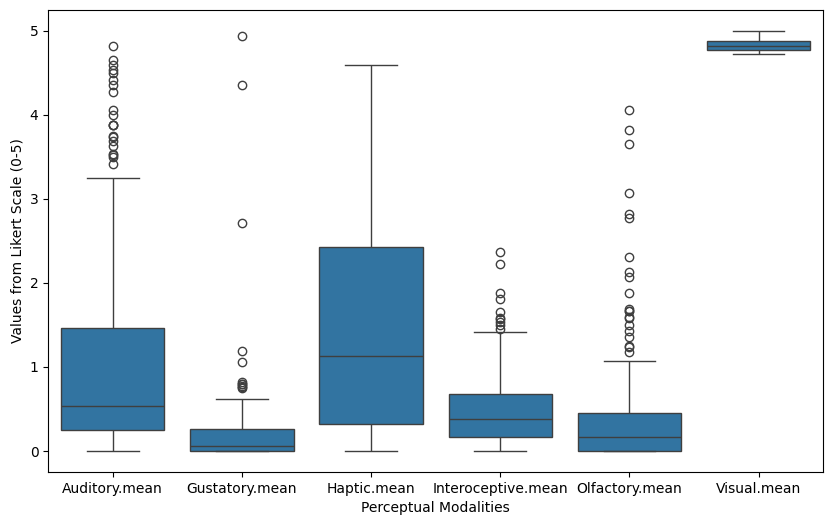

In [252]:
# set the unique visual dataframe to the mixed column
# within the mixed column find the words labeled visual
unique_df_visual = unique_df[unique_df['mixed'] == 'visual']

# define the columns we want in the plot
dimensions = list(unique_df_visual.columns.values)
dimensions = dimensions[1:7] # 'Words' - 'Visual.mean'



# set plot = the unique visual dataframe
data_to_plot = unique_df_visual[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

#### Returns a plot with all the Perceptual Modalities **and** the uniquly haptic words

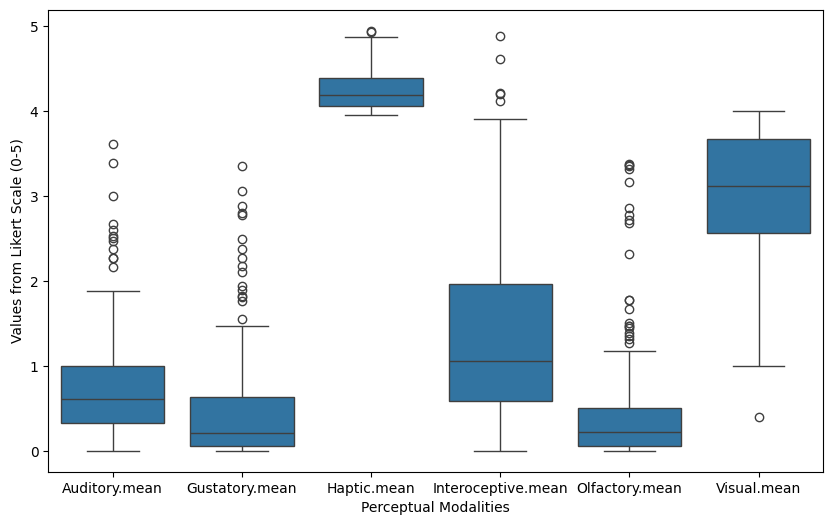

In [253]:
# set the unique haptic dataframe to the mixed column
# within the mixed column find the words labeled 'haptic' 
unique_df_haptic = unique_df[unique_df['mixed'] == 'haptic']

## define the columns we want in the plot 
dimensions = list(unique_df_haptic.columns.values)
dimensions = dimensions[1:7] # 'Word' - 'Visual.mean'


# set plot = the unique haptic dataframe
data_to_plot = unique_df_haptic[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

#### Visuohaptic words
Returns the top 200 visual + 200 haptic low variance words 

Combines them into a single catagory within the 'mixed' column called 'combined'

404 words 

In [254]:
#haptic_subset = haptic_subset[haptic_subset['Visual.mean'] <= 4]
#haptic_subset = haptic_subset.iloc[:300]

In [290]:
# define the columns we want in the plot 
dimensions = list(visual_haptic_sample.columns.values)
#visual_haptic_sample = visual_haptic_sample[:400]
visual_haptic_sample['mixed'] = 'combined'
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
572,AFFIX,0.929,0.143,2.857,1.000,0.214,2.571,combined
31626,SOAK UP,0.444,0.333,2.667,2.111,0.278,2.722,combined
33323,SUCKING,2.688,1.438,2.625,2.625,0.375,2.938,combined
37689,UNWIELDINESS,0.538,0.000,2.154,1.154,0.000,2.846,combined
32740,STIFFEN,0.059,0.000,2.118,1.059,0.000,2.824,combined
...,...,...,...,...,...,...,...,...
10311,DRANK,1.500,3.643,2.071,3.357,1.000,3.000,combined
7394,COUNTERWEIGHT,0.211,0.053,2.105,0.421,0.053,2.895,combined
27102,QUAKE,2.611,0.000,2.167,2.000,0.056,2.611,combined
7533,CRANIAL,0.765,0.353,2.000,1.412,0.235,2.529,combined


In [291]:
len(visual_haptic_sample)

200

#### Returns a plot with the visuohaptic words 

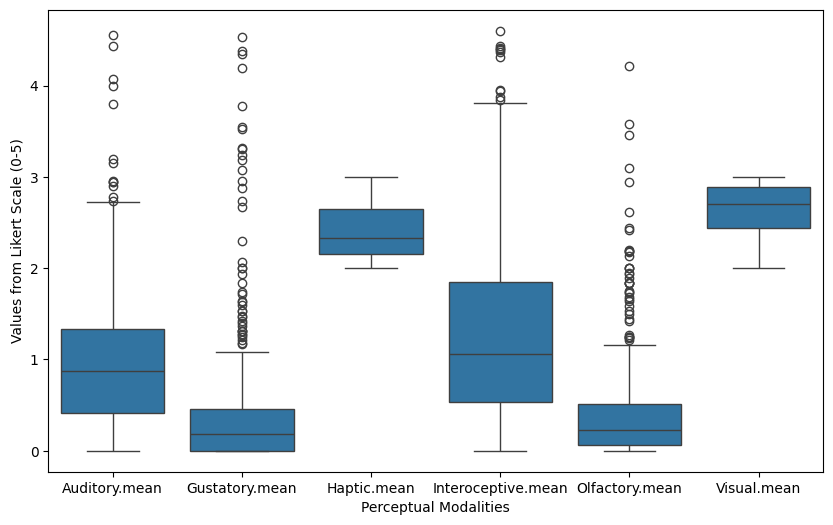

In [256]:
## define the columns we want in the plot 
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[1:7] # 'Word' - 'Visual.mean'


# set plot = the unique haptic dataframe
data_to_plot = visual_haptic_sample[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

# Saving file 

In [304]:
filename = 'Stimuli_master_selsction_3.csv'
combined_visual_haptic_df.to_csv(filename)

In [303]:
len(combined_visual_haptic_df)

800

In [305]:
list is made 
next:

randomize combined_visual_haptic_df
slpit the lists in 2 (probably using iloc)
send one to marco 


work on the scatterplot 
make a plot for the vh_low_norms 
make a plot for the vh_med_norms 

SyntaxError: invalid syntax (3939894828.py, line 2)